In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [8]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [9]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()

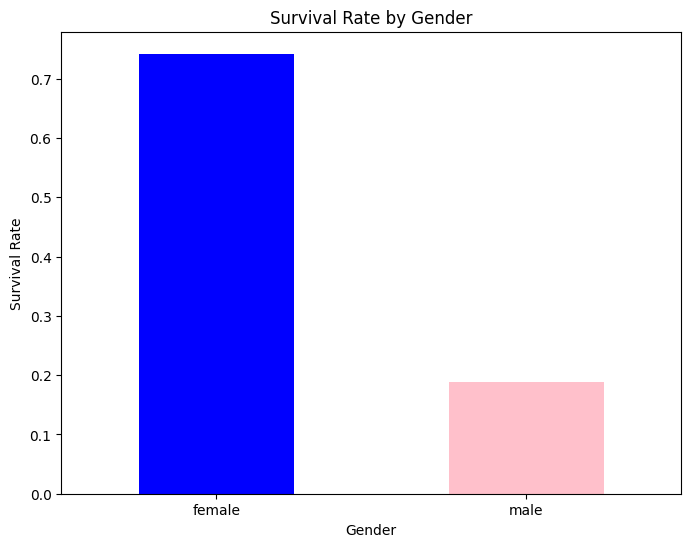

In [10]:
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

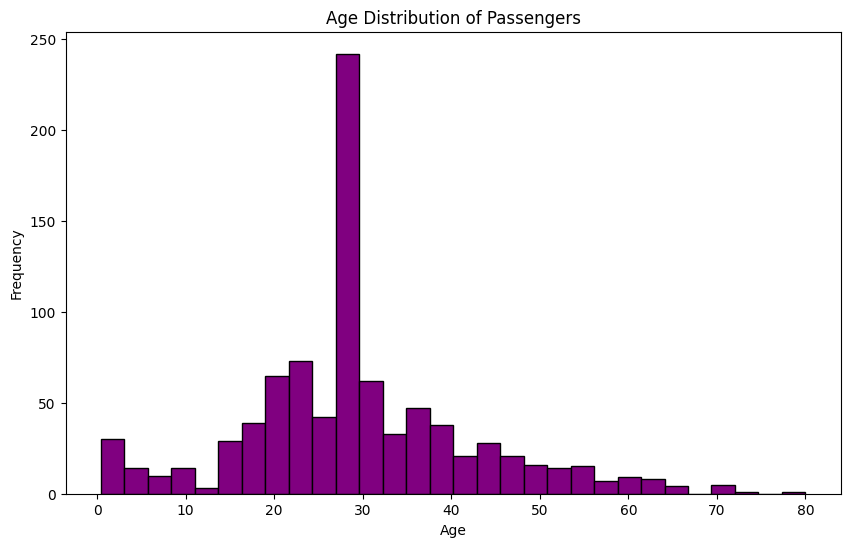

In [11]:
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()

In [13]:
embarkation_survival = df.groupby('Embarked')['Survived'].mean()

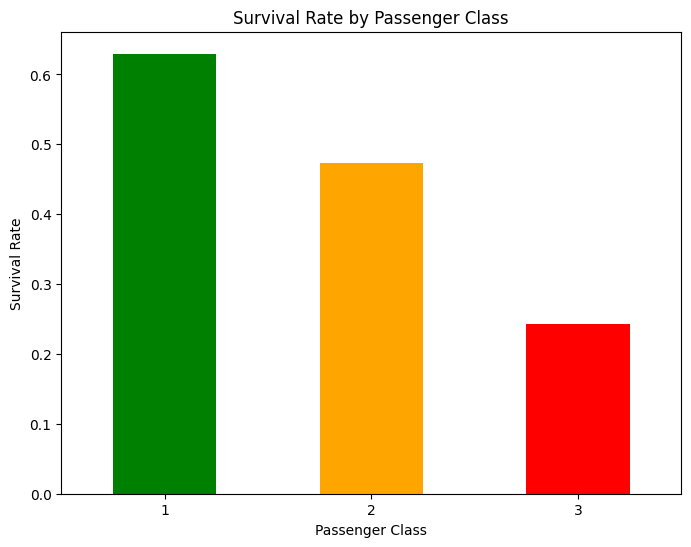

In [14]:
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

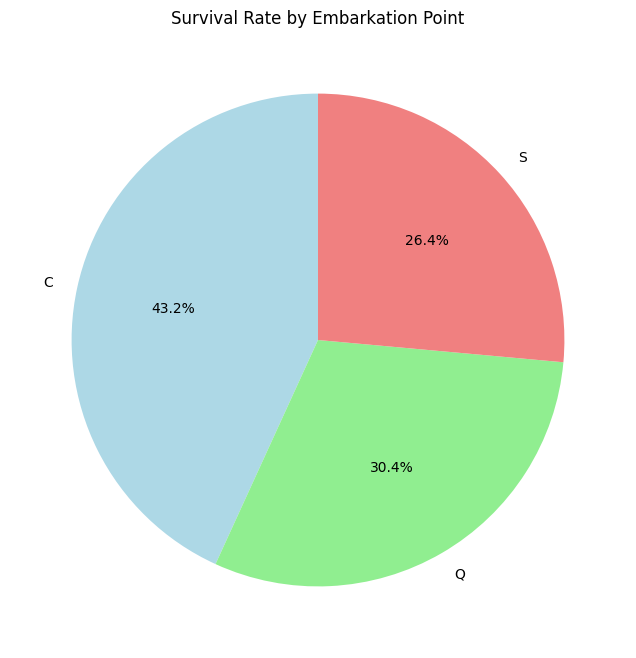

In [15]:
plt.figure(figsize=(8, 8))
embarkation_survival.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('')
plt.show()

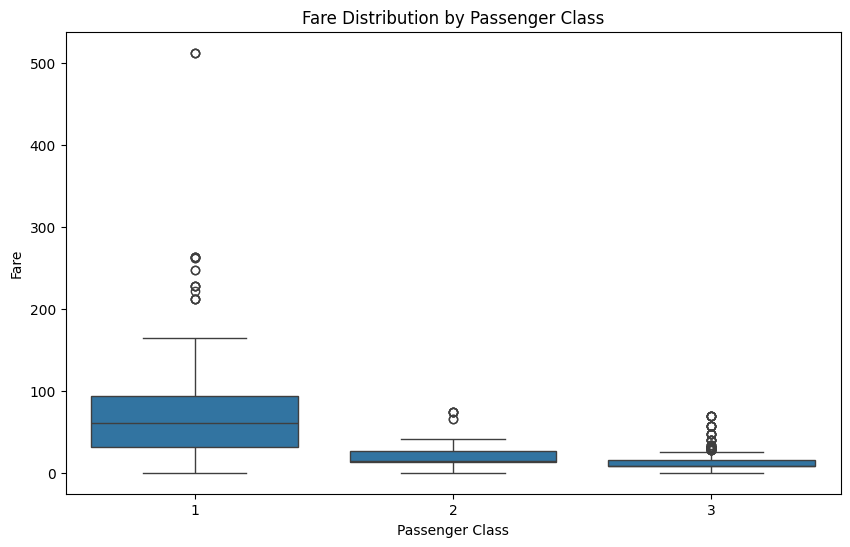

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [17]:
age_bins = [0, 12, 18, 25, 35, 60, 120]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [18]:
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()

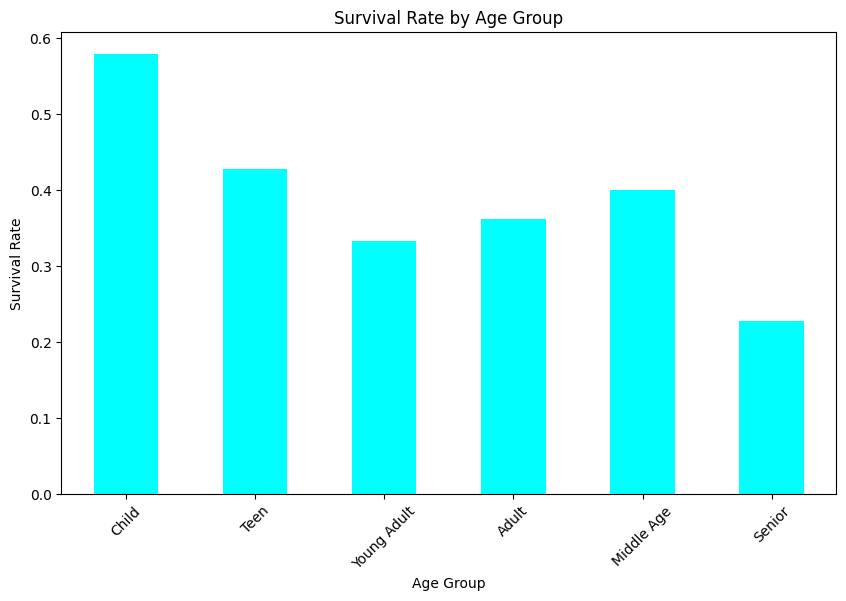

In [19]:
plt.figure(figsize=(10, 6))
survival_by_age_group.plot(kind='bar', color='cyan')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

In [20]:
numeric_df = df.select_dtypes(include='number')

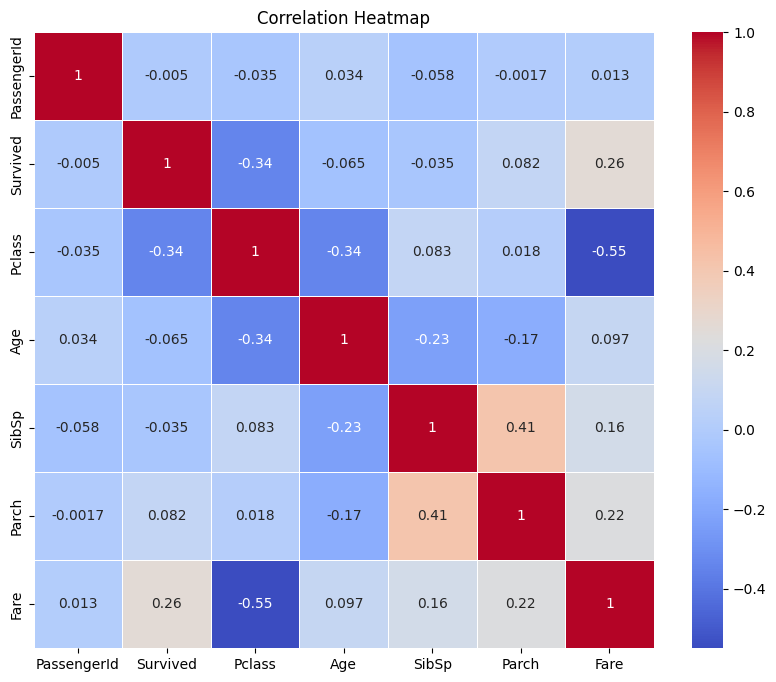

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()